In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('USvideos.csv')


In [5]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
data.shape

(40949, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [9]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [10]:
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [11]:
plt.style.use('seaborn')
sns.set_palette('Set2')

C:\Users\abo7s\AppData\Local\Temp\ipykernel_22896\2525933743.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [30]:
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')

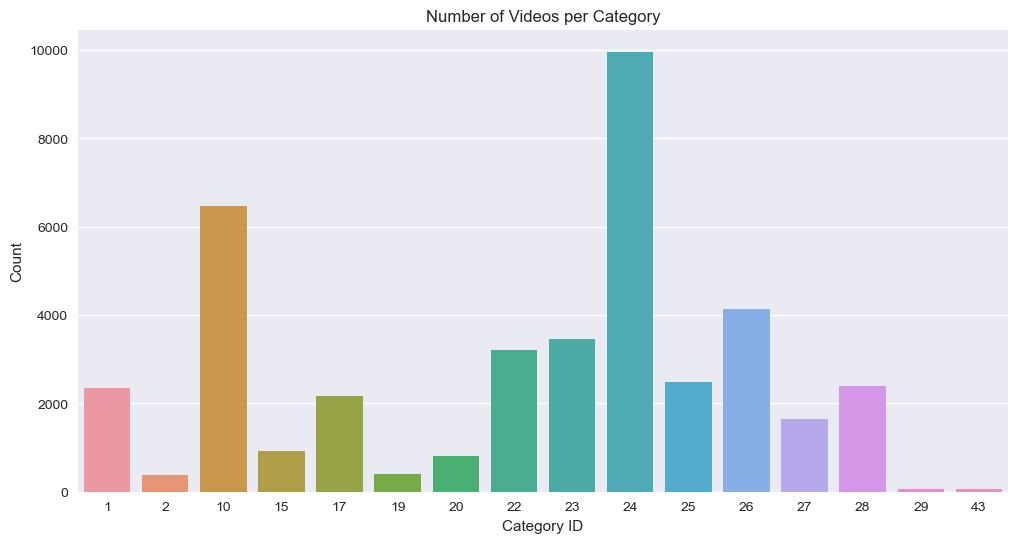

In [31]:
plt.figure(figsize=(12, 6))
category_counts = data['category_id'].value_counts().sort_values(ascending=False)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Videos per Category')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.show()

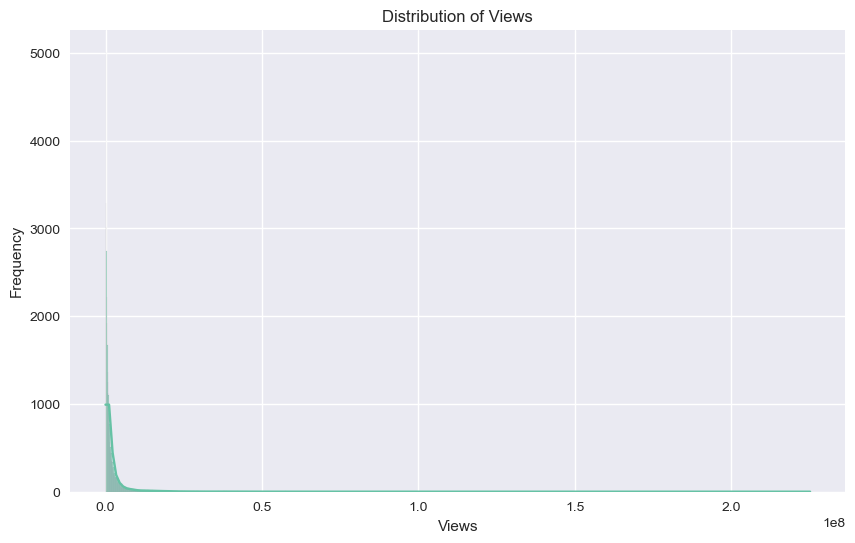

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['views'], kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

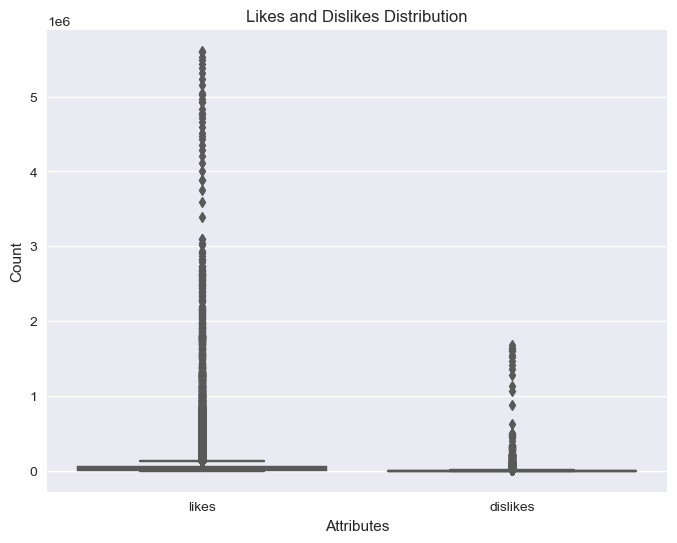

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['likes', 'dislikes']])
plt.title('Likes and Dislikes Distribution')
plt.xlabel('Attributes')
plt.ylabel('Count')
plt.show()

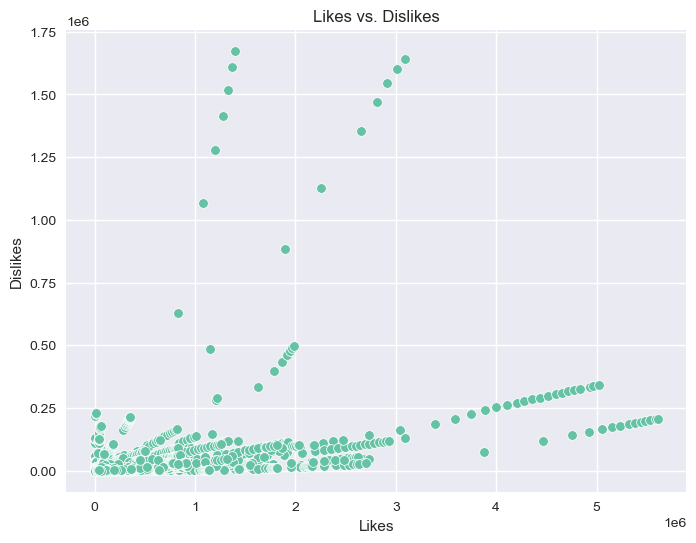

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='likes', y='dislikes')
plt.title('Likes vs. Dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.show()

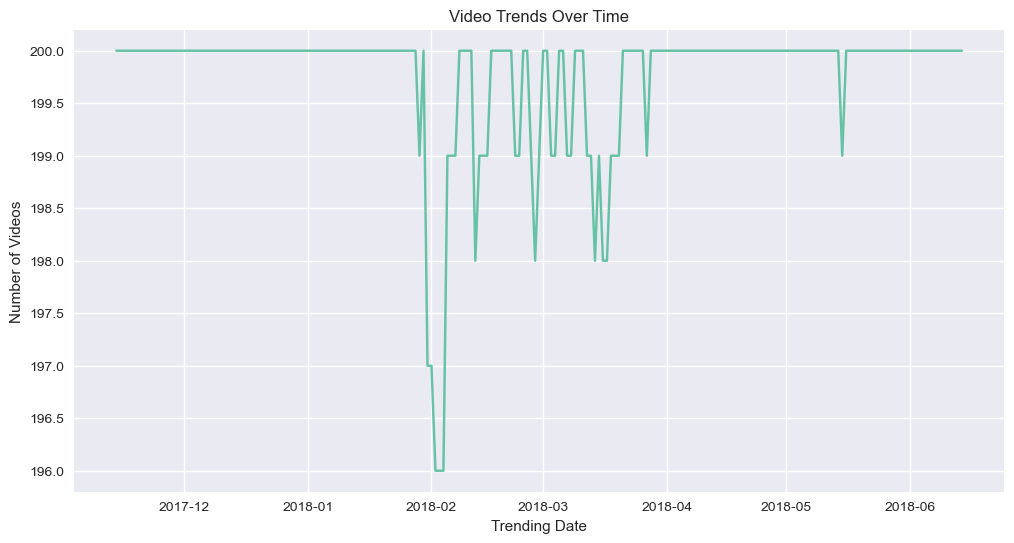

In [35]:
plt.figure(figsize=(12, 6))
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
trends_over_time = data.groupby('trending_date').size()
sns.lineplot(data=trends_over_time)
plt.title('Video Trends Over Time')
plt.xlabel('Trending Date')
plt.ylabel('Number of Videos')
plt.show()

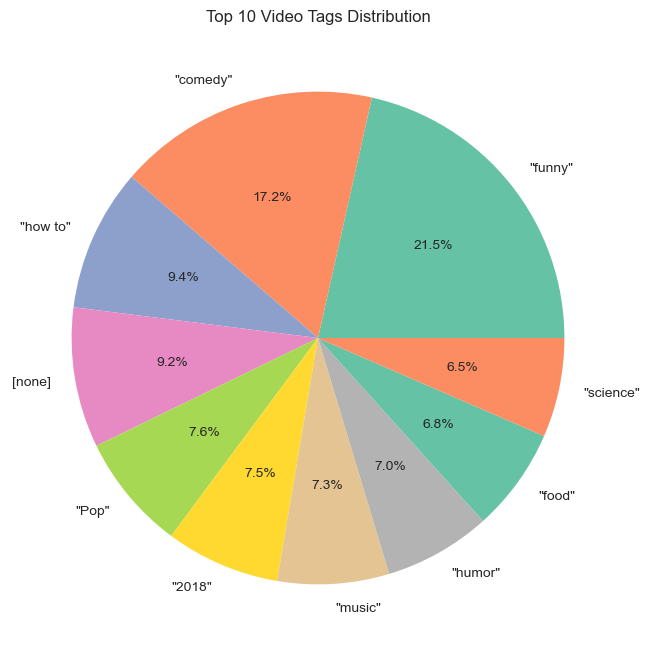

In [36]:
plt.figure(figsize=(8, 8))
tag_counts = data['tags'].str.split('|', expand=True).stack().value_counts().head(10)
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Video Tags Distribution')
plt.show()

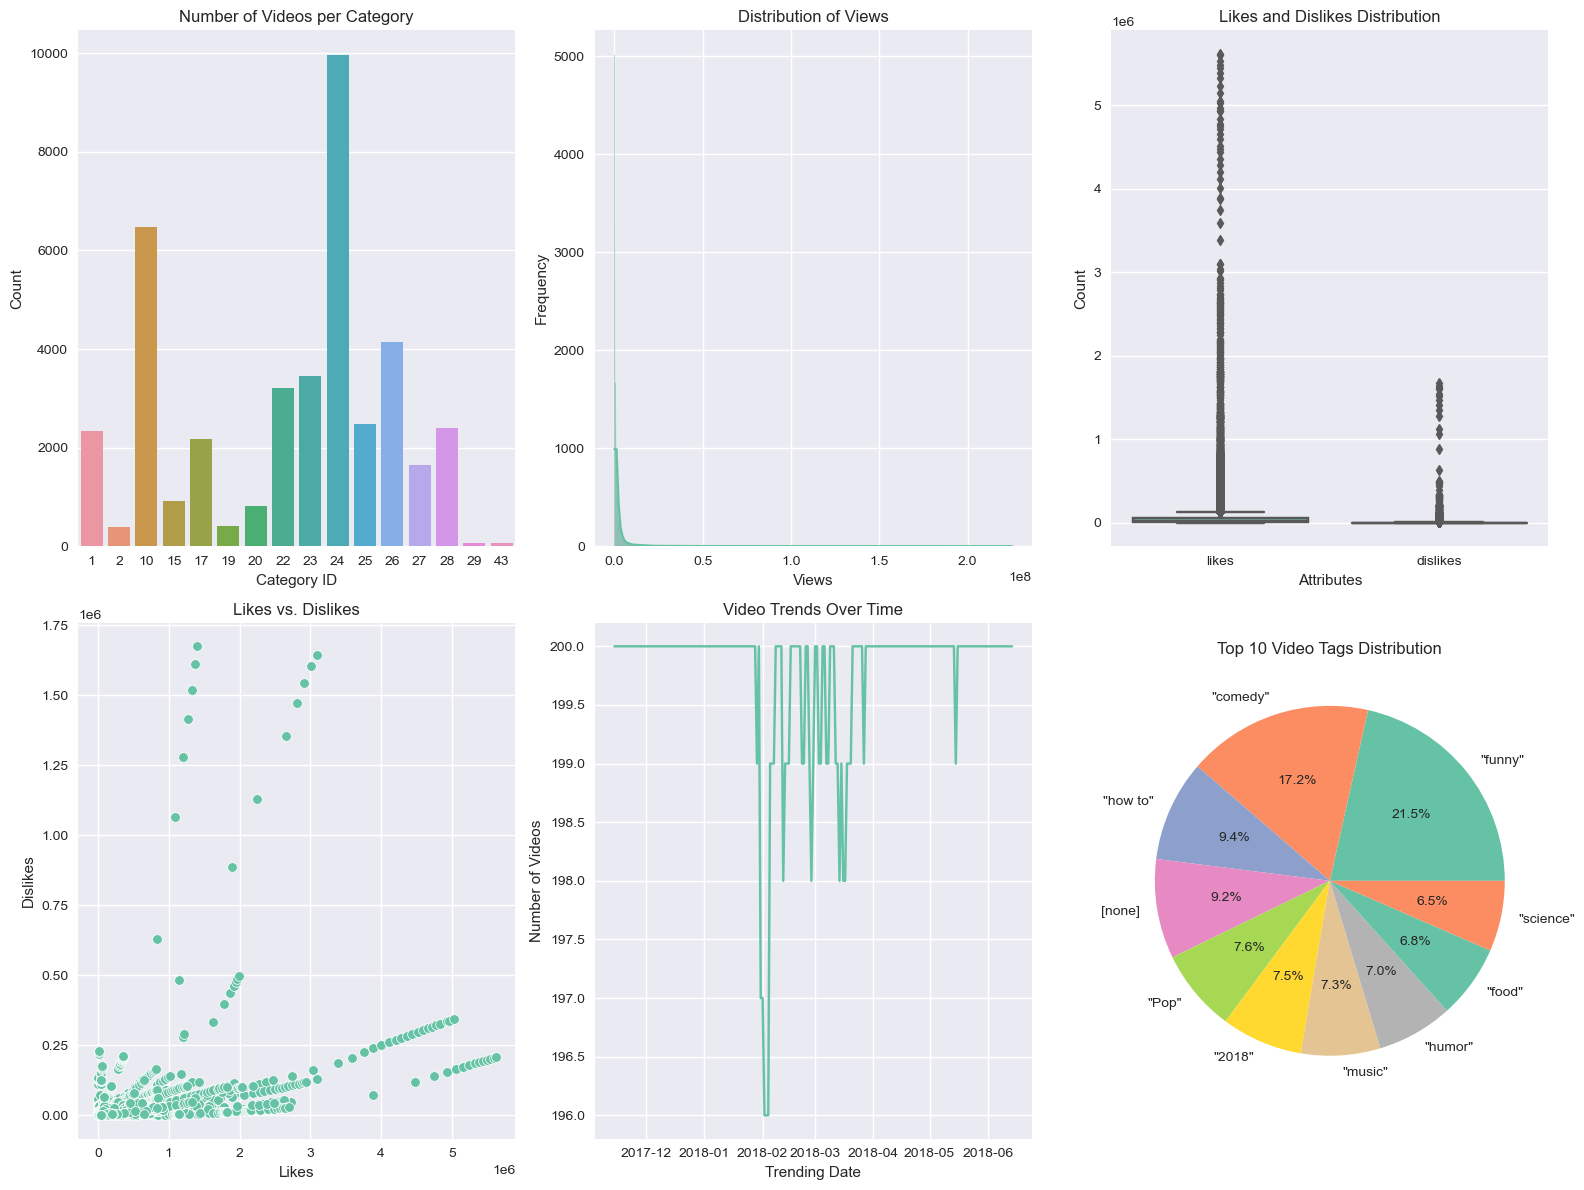

In [21]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Videos per Category')
plt.xlabel('Category ID')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.histplot(data['views'], kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.boxplot(data=data[['likes', 'dislikes']])
plt.title('Likes and Dislikes Distribution')
plt.xlabel('Attributes')
plt.ylabel('Count')

plt.subplot(2, 3, 4)
sns.scatterplot(data=data, x='likes', y='dislikes')
plt.title('Likes vs. Dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')

plt.subplot(2, 3, 5)
sns.lineplot(data=trends_over_time)
plt.title('Video Trends Over Time')
plt.xlabel('Trending Date')
plt.ylabel('Number of Videos')

plt.subplot(2, 3, 6)
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Video Tags Distribution')

plt.tight_layout()